Fichier clothind_sales_data.csv créé avec succès!
Information du dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            200 non-null    datetime64[ns]
 1   product         200 non-null    object        
 2   category        200 non-null    object        
 3   quantity        200 non-null    int64         
 4   price           200 non-null    float64       
 5   region          200 non-null    object        
 6   season          200 non-null    object        
 7   payment_method  200 non-null    object        
 8   customer_type   200 non-null    object        
 9   sales           200 non-null    float64       
 10  month           200 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 17.3+ KB
None

                      date    quantity       price     

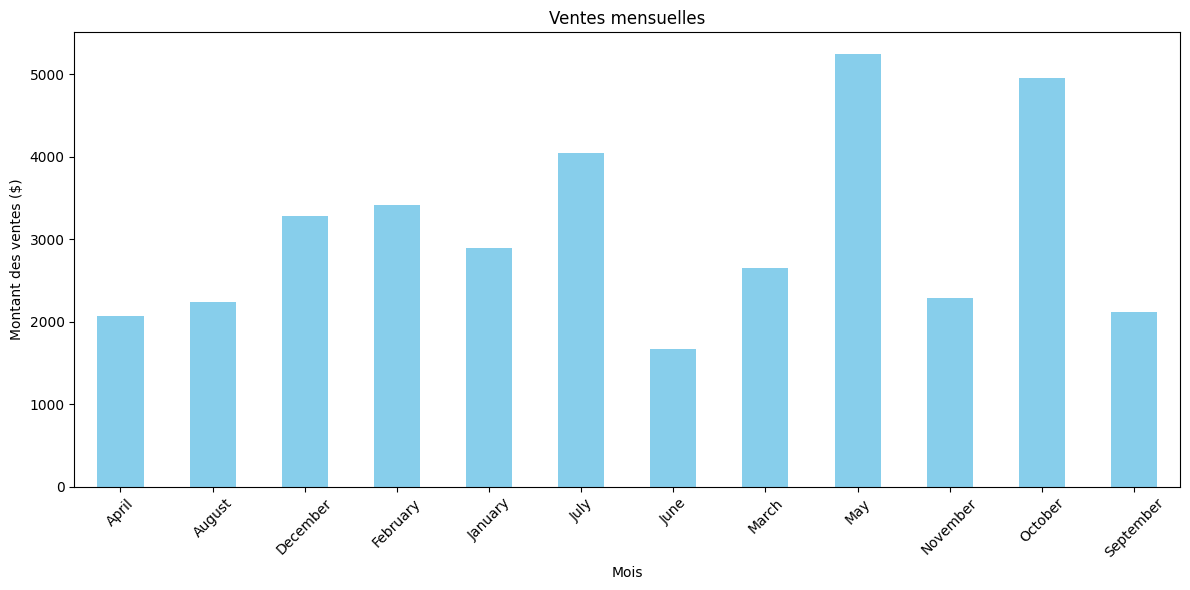

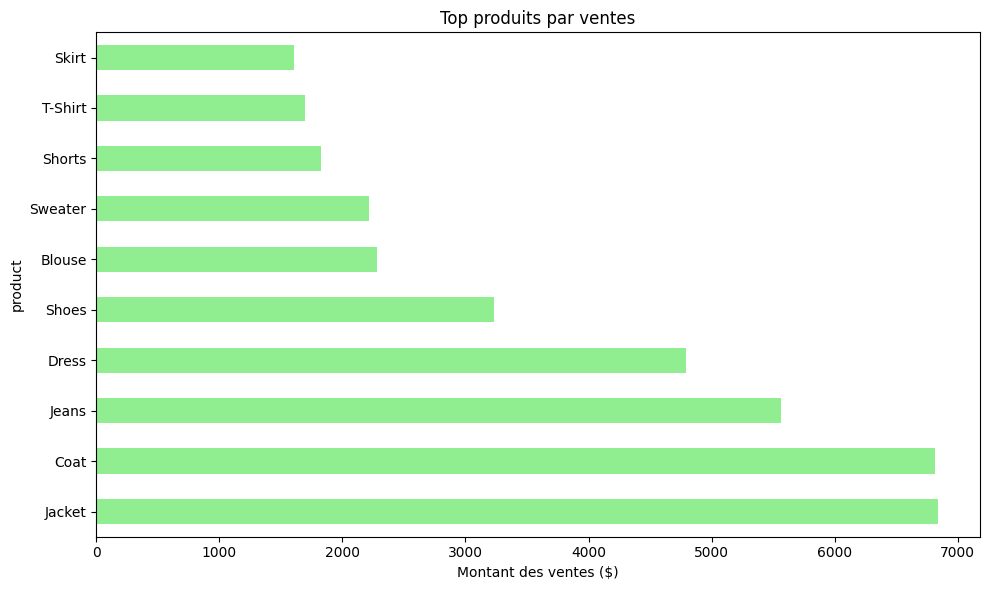

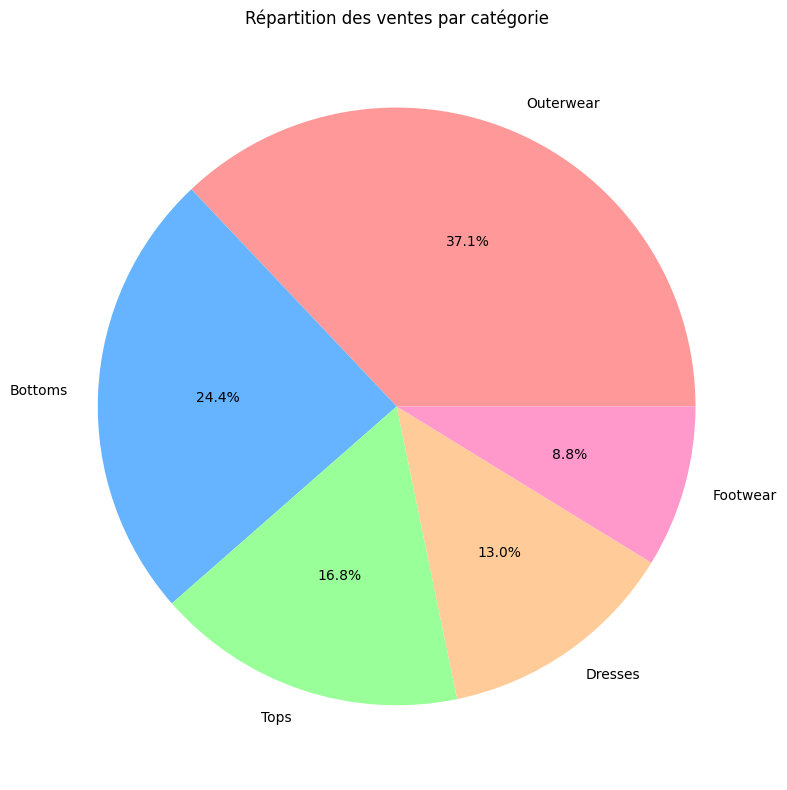

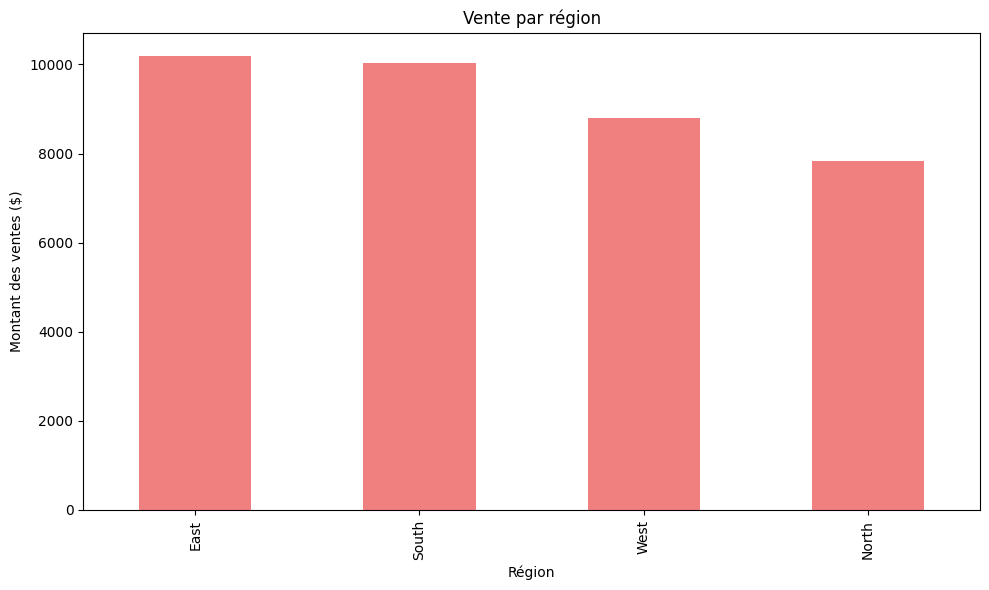

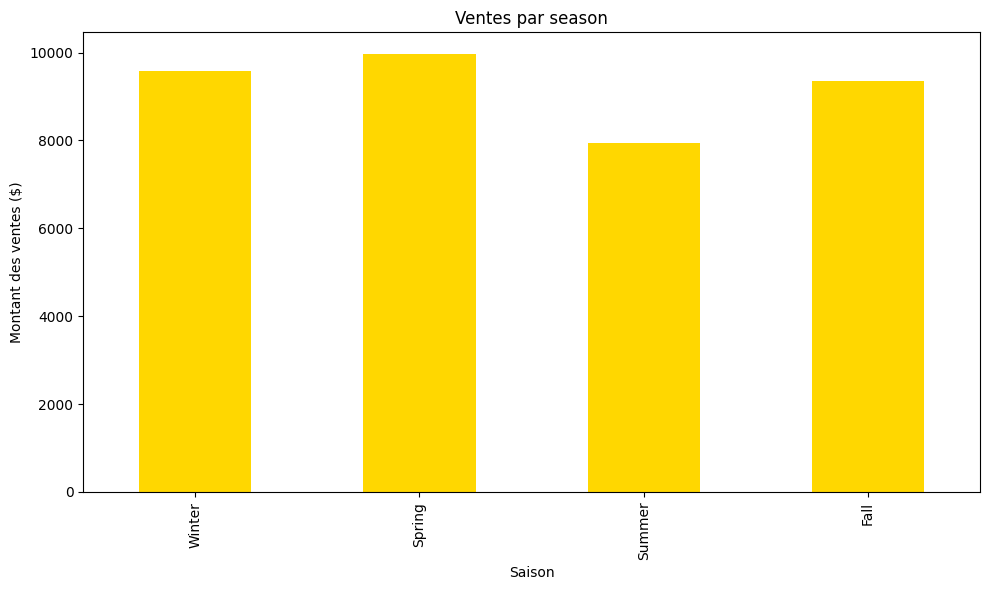

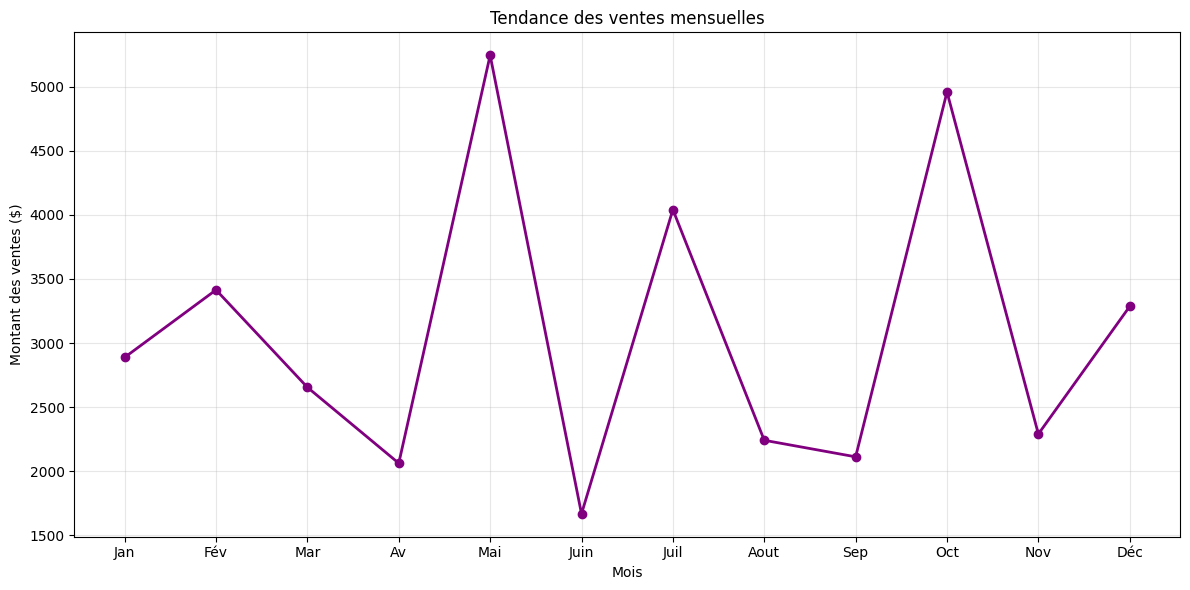

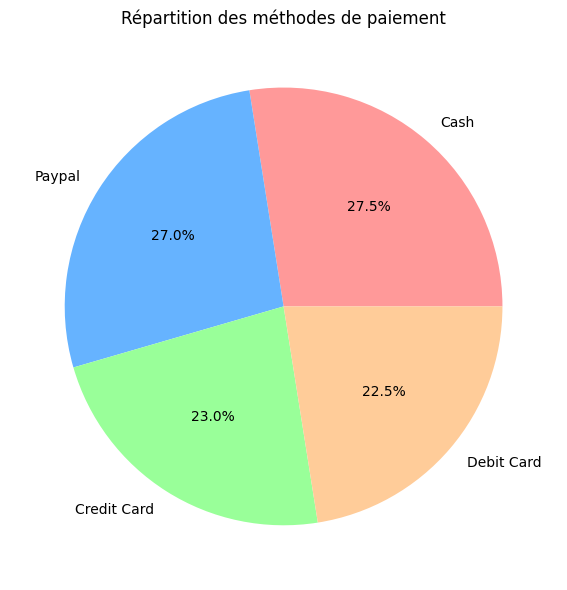

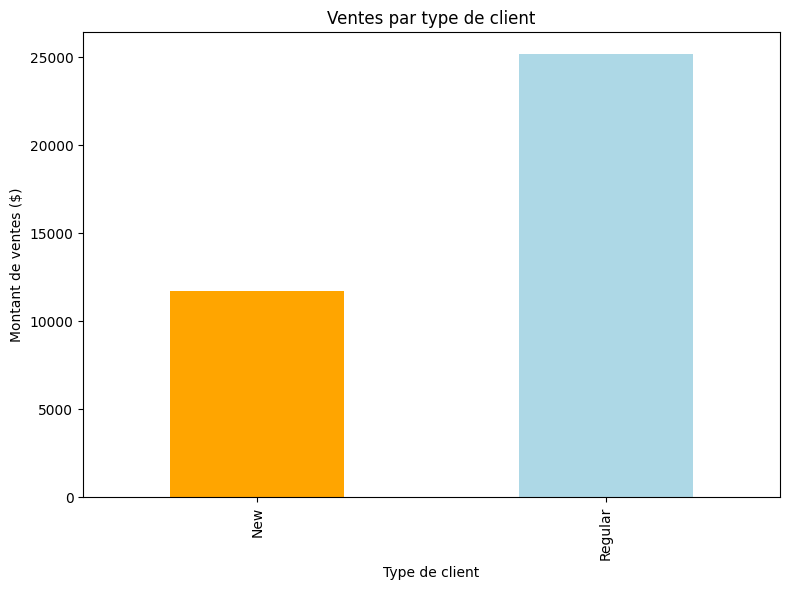

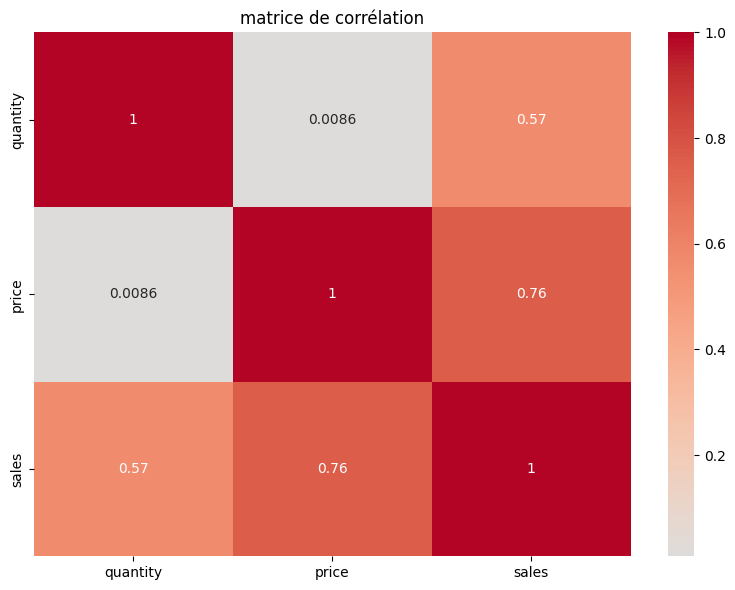

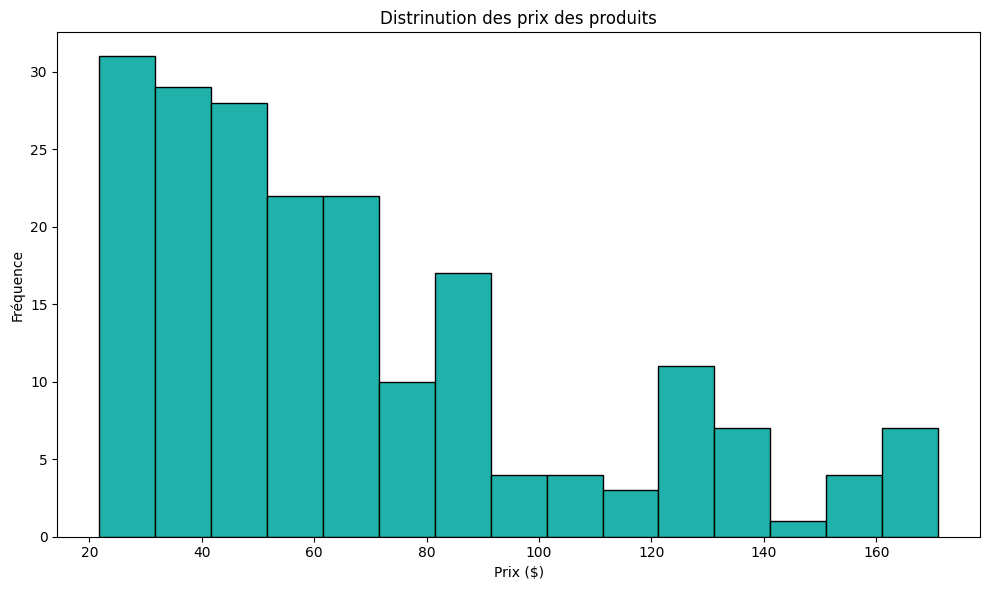


Informations supplémentaires : 
Total des ventes : $184.31
Valeur moyenne des commandes : $184.31
Produit le plus vendu : Jeans
Produit avec le plus de revenus : Jacket
Région la plus performante : East
Saison la plus rentable : Spring
méthode paiement plus populaire : Cash
quantité totle vendue : 541 unitéz
Porcentage de client réguliers : 67.0

Anzlyse avancées : 

ventes par catégorie et saison:
season        Fall   Spring   Summer   Winter
category                                     
Bottoms    2362.07  1759.67  1593.08  3280.33
Dresses    1265.77  1334.72  1140.92  1048.75
Footwear   1368.37   509.50   658.22   693.13
Outerwear  2730.13  4796.08  3018.80  3112.31
Tops       1634.69  1561.83  1538.65  1454.15

Ventes moyenne par région et type de client : 
customer_type         New     Regular
region                               
East           158.238125  219.113429
North          181.765294  182.221538
South          178.301176  194.286944
West           190.280625  155.748108

<Figure size 1200x800 with 0 Axes>

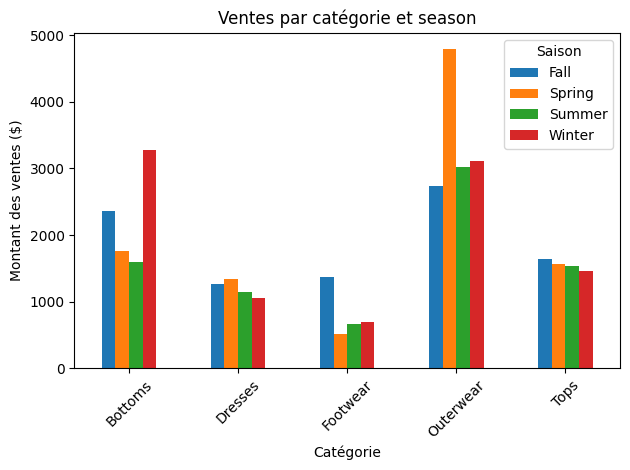

<Figure size 1000x600 with 0 Axes>

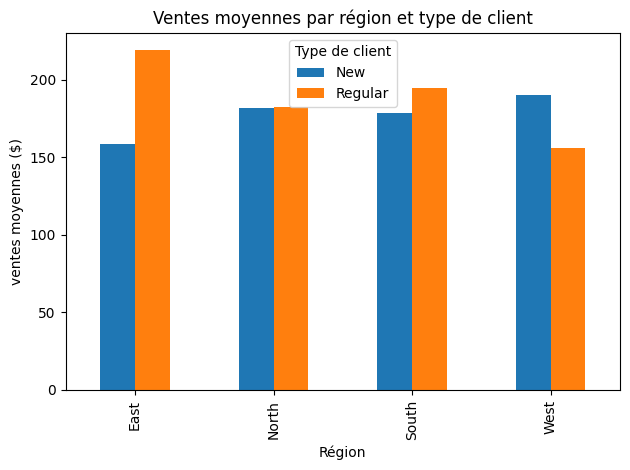


Aperçu des données : 
        date  product   category  quantity   price region  season  \
0 2023-03-14  T-Shirt       Tops         3   25.07   West  Spring   
1 2023-07-28   Jacket  Outerwear         4  135.45  North  Summer   
2 2023-09-08   Blouse       Tops         3   49.98  South    Fall   
3 2023-06-07   Shorts    Bottoms         4   36.93  South  Summer   
4 2023-12-27    Dress    Dresses         4   73.38   East  Winter   
5 2023-12-08    Shoes   Footwear         4   87.85  South  Winter   
6 2023-08-25    Dress    Dresses         1   72.41  North  Summer   
7 2023-09-28    Jeans    Bottoms         2   57.09  South    Fall   
8 2023-05-08    Shoes   Footwear         3   88.90   East  Spring   
9 2023-09-15    Jeans    Bottoms         2   62.16   East    Fall   

  payment_method customer_type   sales      month  month_num  
0     Debit Card       Regular   75.22      March          3  
1         Paypal       Regular  541.81       July          7  
2           Cash       Regul

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

def create_clothing_sales_data():
    products = ['T-Shirt', 'Jeans', 'Sweater', 'Jacket', 'Dress', 'Skirt', 'Shorts', 'Coat', 'Blouse', 'Shoes']
    categories = ['Tops', 'Bottoms', 'Tops', 'Outerwear', 'Dresses', 'Bottoms', 'Bottoms', 'Outerwear', 'Tops', 'Footwear']
    prices = [25, 60, 45, 120, 80, 40, 35, 150, 55, 90]
    seasons = {
        1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 
        5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer',
        9: 'Fall', 10: 'Fall', 11:'Fall', 12: 'Winter'
    }

    product_info = {products[i] : {'category': categories[i], 'price': prices[i]} for i in range(len(products))}

    data = []

    for i in range(200):
        product = np.random.choice(products)
        category = product_info[product]['category']
        base_price = product_info[product]['price']
        price = base_price * (1 + np.random.uniform(-0.15, 0.15))
        quantity = np.random.randint(1, 5)
        month = np.random.randint(1, 13)
        day = np.random.randint(1, 29)
        date = f"2023-{month:02d}-{day:02d}"
        season = seasons[month]
        region = np.random.choice(['North', 'South', 'East', 'West'])
        payment_method = np.random.choice(['Credit Card', 'Debit Card', 'Cash', 'Paypal'])
        customer_type = np.random.choice(['Regular', 'New'], p=[0.7, 0.3])
        sales = quantity * price

        data.append({
            'date': date,
            'product': product,
            'category': category,
            'quantity': quantity,
            'price': round(price, 2),
            'region': region,
            'season': season,
            'payment_method': payment_method,
            'customer_type': customer_type,
            'sales' : round(sales, 2)
        })

    df = pd.DataFrame(data)
    df.to_csv('clothing_sales_data.csv', index=False)
    print("Fichier clothind_sales_data.csv créé avec succès!")
    return df

df = create_clothing_sales_data()
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month_name()

print("Information du dataset : ")
print("=" * 50)
print(df.info())
print("\n" + "=" * 50)
print(df.describe())
print("\n" + "=" * 50)

print("\nValeurs manquantes : ")
print('=' * 50)
print(df.isnull().sum())
print("\n" + "=" * 50)


plt.figure(figsize=(12,6))
monthly_sales = df.groupby('month')['sales'].sum()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_sales = monthly_sales.reindex(month_order)
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Ventes mensuelles')
plt.xlabel('Mois')
plt.ylabel('Montant des ventes ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
top_products = df.groupby('product')['sales'].sum().sort_values(ascending=False)
top_products.plot(kind='barh', color='lightgreen')
plt.title('Top produits par ventes')
plt.xlabel('Montant des ventes ($)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
category_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False)
plt.pie(category_sales.values, labels=category_sales.index, autopct="%1.1f%%", colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc'])
plt.title("Répartition des ventes par catégorie")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', color='lightcoral')
plt.title('Vente par région')
plt.xlabel('Région')
plt.ylabel('Montant des ventes ($)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
season_sales = df.groupby('season')['sales'].sum()
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_sales = season_sales.reindex(season_order)
season_sales.plot(kind='bar', color='gold')
plt.title('Ventes par season')
plt.xlabel('Saison')
plt.ylabel('Montant des ventes ($)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
df['month_num'] = df['date'].dt.month
monthly_trend = df.groupby('month_num')['sales'].sum()
monthly_trend.plot(kind="line", marker='o', color='purple', linewidth=2)
plt.title('Tendance des ventes mensuelles')
plt.xlabel('Mois')
plt.ylabel('Montant des ventes ($)')
plt.xticks(range(1, 13), ['Jan', 'Fév', 'Mar', 'Av', 'Mai', 'Juin', 'Juil', 'Aout', 'Sep', 'Oct', 'Nov', 'Déc'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
payment_counts = df['payment_method'].value_counts()
payment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Répartition des méthodes de paiement')
plt.ylabel('')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
customer_sales = df.groupby('customer_type')['sales'].sum()
customer_sales.plot(kind='bar', color=['orange', 'lightblue'])
plt.title('Ventes par type de client')
plt.xlabel('Type de client')
plt.ylabel('Montant de ventes ($)')
plt.tight_layout()
plt.show()

numeric_df = df[['quantity', 'price', 'sales']]
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('matrice de corrélation')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=15, color='lightseagreen', edgecolor='black')
plt.title('Distrinution des prix des produits')
plt.xlabel('Prix ($)')
plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()


print("\nInformations supplémentaires : ")
print("=" * 50)
print(f"Total des ventes : ${df['sales'].mean():,.2f}")
print(f"Valeur moyenne des commandes : ${df['sales'].mean():,.2f}")
print(f"Produit le plus vendu : {df.groupby('product')['quantity'].sum().idxmax()}")
print(f"Produit avec le plus de revenus : {df.groupby('product')['sales'].sum().idxmax()}")
print(f"Région la plus performante : {df.groupby('region')['sales'].sum().idxmax()}")
print(f"Saison la plus rentable : {df.groupby('season')['sales'].sum().idxmax()}")
print(f"méthode paiement plus populaire : {df['payment_method'].value_counts().idxmax()}")
print(f"quantité totle vendue : {df['quantity'].sum()} unitéz")
print(f"Porcentage de client réguliers : {(df['customer_type'] == 'Regular').mean() * 100:.1f}")

print("\nAnzlyse avancées : ")
print("="*50)

category_season_sales = df.groupby(['category', 'season'])['sales'].sum().unstack()
print("\nventes par catégorie et saison:")
print(category_season_sales)

region_customer_sales = df.groupby(['region', 'customer_type'])['sales'].mean().unstack()
print("\nVentes moyenne par région et type de client : ")
print(region_customer_sales)

print("\nTop 3 produits par région : ")
for region in df['region'].unique():
    region_products = df[df['region'] == region].groupby('product')['sales'].sum().nlargest(3)
    print(f"\n{region} : ")

    for product, sales in region_products.items():
        print(f"  {product} : ${sales:.2f}")

plt.figure(figsize=(12, 8))
category_season_sales.plot(kind='bar')
plt.title("Ventes par catégorie et season")
plt.xlabel('Catégorie')
plt.ylabel('Montant des ventes ($)')
plt.xticks(rotation=45)
plt.legend(title='Saison')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
region_customer_sales.plot(kind='bar')
plt.title('Ventes moyennes par région et type de client')
plt.xlabel('Région')
plt.ylabel('ventes moyennes ($)')
plt.legend(title='Type de client')
plt.tight_layout()
plt.show()
    

print("\nAperçu des données : ")
print('=' * 50)
print(df.head(10))